In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Zadanie 1

In [65]:
mean = 2
std = 30
size = 200
sample = np.random.normal(mean, std, size)
hypothetical_mean = 2.5

In [66]:
_, p = stats.ttest_1samp(sample, hypothetical_mean)

if p < 0.05:
    print("Odrzucamy hipotezę zerową")
else:
    print("Nie możemy odrzucić hipotezy zerowej")

Odrzucamy hipotezę zerową


### Zadanie 2

In [67]:
df = pd.read_csv('napoje.csv',sep=';')
df

,mies,rok,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,2001,108447,43302,186385,54301,45065,227013,56306
1,2,2001,105439,46711,168782,68131,43933,221115,67212
2,3,2001,111675,36029,172186,63104,46663,222812,67398
3,4,2001,113232,33659,172445,50871,45195,238631,57100
4,5,2001,110274,40853,174526,67924,47926,222963,65001
...,...,...,...,...,...,...,...,...,...
187,8,2016,105949,43017,169329,64262,58101,222531,58037
188,9,2016,103420,44310,173923,67591,44565,230270,65156
189,10,2016,120363,50688,175856,63791,51376,247155,59276
190,11,2016,101215,41924,175914,62570,59505,240524,61765


In [68]:
_, p1 = stats.ttest_1samp(df['lech'].to_numpy(), 60500)
_, p2 = stats.ttest_1samp(df['cola'].to_numpy(), 222000)
_, p3 = stats.ttest_1samp(df['regionalne'].to_numpy(), 43500)

print(p1, p2,p3)
if p1 < 0.05 and p2<0.05 and p3< 0.05:
    print("Odrzucamy hipotezę zerową")
else:
    print("Nie możemy odrzucić hipotezy zerowej")


0.10130442686854728 1.2249714535216756e-09 2.2572528828603765e-41
Nie możemy odrzucić hipotezy zerowej


### zadanie 3

In [69]:
import scipy.stats as stats

for x in df.columns:
    pvalue = stats.shapiro(df[x])[1]

    if pvalue > 0.05:
        print("Dla kolumny", x, "dane wykazują normalność", pvalue)
    else:
        print("Dla kolumny", x, "dane nie wykazują normalności", pvalue)



Dla kolumny mies dane nie wykazują normalności 4.075907327205641e-07
Dla kolumny rok dane nie wykazują normalności 1.3102297771183657e-06
Dla kolumny pepsi dane wykazują normalność 0.2968809902667999
Dla kolumny fanta  dane wykazują normalność 0.17036965489387512
Dla kolumny żywiec dane wykazują normalność 0.3080885708332062
Dla kolumny okocim dane wykazują normalność 0.08890535682439804
Dla kolumny regionalne dane nie wykazują normalności 1.8769230791804148e-07
Dla kolumny cola dane wykazują normalność 0.5694407224655151
Dla kolumny lech dane wykazują normalność 0.5875554084777832


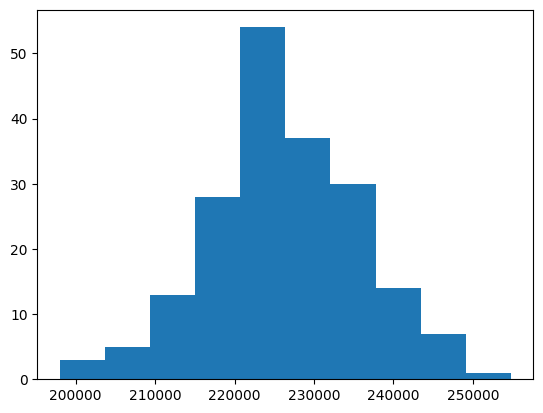

In [70]:
plt.hist(df['cola'])
plt.show()

### zadanie 4

In [71]:
print('okocim i lech ', stats.ttest_ind(df['okocim'], df['lech']))
print('fanta i regionalne ', stats.ttest_ind(df['fanta '], df['regionalne']))
print('cola i pepsi ', stats.ttest_ind(df['cola'], df['pepsi']))

okocim i lech  Ttest_indResult(statistic=-0.8323919685480173, pvalue=0.4057078093583594)
fanta i regionalne  Ttest_indResult(statistic=-11.013919429372727, pvalue=1.097001288015355e-24)
cola i pepsi  Ttest_indResult(statistic=145.61815604546564, pvalue=0.0)


In [72]:
print('okocim i lech ', stats.mannwhitneyu(df['okocim'], df['lech']))
print('fanta i regionalne ', stats.mannwhitneyu(df['fanta '], df['regionalne']))
print('cola i pepsi ', stats.mannwhitneyu(df['cola'], df['pepsi']))

okocim i lech  MannwhitneyuResult(statistic=17861.5, pvalue=0.6001922392671175)
fanta i regionalne  MannwhitneyuResult(statistic=8106.5, pvalue=2.223371766550974e-21)
cola i pepsi  MannwhitneyuResult(statistic=36864.0, pvalue=1.9894396616299057e-64)


### zadanie 5

In [73]:
print('okocim i lech ', stats.f_oneway(df['okocim'], df['lech']))
print('zywiec i fanta ', stats.f_oneway(df['żywiec'], df['fanta ']))
print('regionalne i cola ', stats.f_oneway(df['regionalne'], df['cola']))

okocim i lech  F_onewayResult(statistic=0.6928763893032434, pvalue=0.4057078093583606)
zywiec i fanta  F_onewayResult(statistic=70185.88074802411, pvalue=0.0)
regionalne i cola  F_onewayResult(statistic=56462.96887396712, pvalue=0.0)


### zadanie 6

In [74]:
t_test = stats.ttest_ind(df['regionalne'][(df['rok'] == 2001)], df['regionalne'][(df['rok'] == 2015)])
print(t_test)

Ttest_indResult(statistic=-3.5977780582718273, pvalue=0.0016000242362201897)


### zadanie 7

In [75]:
df_po_reklamie = pd.read_csv('napoje_po_reklamie.csv',sep=';')
df_po_reklamie

,mies,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,119110,41386,186272,64398,55561,215468,68673
1,2,107424,45669,178564,61847,48793,233941,68483
2,3,105748,47373,183368,53390,63907,229677,63300
3,4,115377,39395,184326,60062,58531,234246,61943
4,5,103003,42477,182190,63736,51395,219392,64189
5,6,102809,47224,183115,52596,55149,219600,63343
6,7,106890,45185,184858,54457,52977,225857,63466
7,8,103613,38748,185559,61437,61143,226311,68841
8,9,112709,34145,186496,62945,59051,232491,65195
9,10,112780,37407,182187,67979,60212,235802,57058


In [76]:
cola_test = stats.wilcoxon(df[(df['rok'] == 2016)]['cola'], df_po_reklamie['cola'])
fanta_test = stats.wilcoxon(df[(df['rok'] == 2016)]['fanta '], df_po_reklamie['fanta '])
pepsi_test = stats.wilcoxon(df[(df['rok'] == 2016)]['pepsi'], df_po_reklamie['pepsi'])

print(cola_test)
print(fanta_test)
print(pepsi_test)

WilcoxonResult(statistic=37.0, pvalue=0.90966796875)
WilcoxonResult(statistic=35.0, pvalue=0.791015625)
WilcoxonResult(statistic=37.0, pvalue=0.90966796875)
